# 1- Import all necessary libraries for the machine learning project.

In [ ]:
# import the necessary libraries
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn import model_selection, metrics, preprocessing, linear_model, neighbors, svm, tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report



# 2- Download the dataset using tf.keras.dataset

In [ ]:
# download the required dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


4431872/4422102 [==============================] - 0s 0us/step


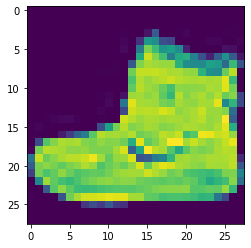

In [ ]:
# plot image samples from the dataset 
plt.imshow(x_train[0])

In [ ]:
# check the shape of the following (x_train, y_train and x_test, y_test)
print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


(array([1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
        1000.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

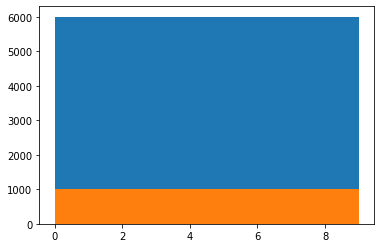

In [ ]:
# plot the histogram of the target from the training and testing distribution 

plt.hist(y_train)
plt.hist(y_test)

# 3- Make sure the pixels values are scaled between (0-1)

In [ ]:
# scale the pixels values between 0-1
# train set / data 
x_train = np.expand_dims(x_train, axis=-1)
# x_train = np.repeat(x_train, 3, axis=-1)
x_train = x_train.astype('float32') / 255

# validation set / data 
x_test = np.expand_dims(x_test, axis=-1)
# x_test = np.repeat(x_test, 3, axis=-1)
x_test = x_test.astype('float32') / 255

In [ ]:
# convert the images into vectors
x_train_vec = x_train.reshape(-1, 28*28)
x_test_vec = x_test.reshape(-1, 28*28)


# 4- Make sure to convert the target into one hot vector

In [ ]:
# encode the training and testing target into one hot vector
y_train_hot = tf.keras.utils.to_categorical(y_train, 10)
y_test_hot =tf.keras.utils.to_categorical(y_test, 10)

# 5- Modeling
Train six different models (KNN, Logistics Regression, Support Vector Machine, Decision Tree, Random Forest, DNN)


**Note:**
1. Make sure to saperate each model in a new sub-section.
2. Make sure to achieve the following results for the testing data: 
<br> Accuracy equal or above "95%", and Loss equal or below "0.1".
3. Plot the loss and validation loss values from the training history of the DNN model.
4. Use the right evaluation metrics to choose the best model (write down your choice of the best model).

## KNN Model

In [ ]:
# build the model
knn = neighbors.KNeighborsClassifier(n_neighbors=5, algorithm='auto', leaf_size=5)
knn.fit(x_train_vec, y_train)

KNeighborsClassifier(leaf_size=5)

### Model evaluation

In [ ]:
# evaluate the model
pred = knn.predict(x_test_vec)
print(f'accuracy: {metrics.accuracy_score(y_test,pred)}')
print(classification_report(y_test, pred))


accuracy: 0.8554
              precision    recall  f1-score   support

           0       0.77      0.85      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.73      0.82      0.77      1000
           3       0.90      0.86      0.88      1000
           4       0.79      0.77      0.78      1000
           5       0.99      0.82      0.90      1000
           6       0.66      0.57      0.61      1000
           7       0.88      0.96      0.92      1000
           8       0.97      0.95      0.96      1000
           9       0.90      0.97      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.85     10000
weighted avg       0.86      0.86      0.85     10000



## Logistics Regression

In [ ]:
logistics_model = linear_model.LogisticRegression(solver='sag', C=0.01, max_iter=200)
logistics_model.fit(x_train_vec, y_train)

LogisticRegression(C=0.01, max_iter=200, solver='sag')

### Model Evaluation

In [ ]:
pred = logistics_model.predict(x_test_vec)
print(f'accuracy: {metrics.accuracy_score(y_test,pred)}')
print(classification_report(y_test, pred))

accuracy: 0.8388
              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1000
           1       0.98      0.95      0.96      1000
           2       0.72      0.73      0.73      1000
           3       0.83      0.88      0.85      1000
           4       0.72      0.76      0.74      1000
           5       0.92      0.91      0.91      1000
           6       0.63      0.56      0.59      1000
           7       0.90      0.92      0.91      1000
           8       0.93      0.94      0.93      1000
           9       0.93      0.94      0.93      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



## Support Vector Machine

In [ ]:
svm_model = svm.SVC(kernel='rbf')
svm_model.fit(x_train_vec, y_train)

SVC()

### Model Evaluation

In [ ]:
pred = svm_model.predict(x_test_vec)
print(f'accuracy: {metrics.accuracy_score(y_test,pred)}')
print(classification_report(y_test, pred))

accuracy: 0.8828
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.79      0.82      0.80      1000
           3       0.87      0.89      0.88      1000
           4       0.81      0.81      0.81      1000
           5       0.96      0.95      0.96      1000
           6       0.72      0.65      0.69      1000
           7       0.93      0.95      0.94      1000
           8       0.97      0.98      0.97      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



## Decision Tree

In [ ]:
tree_model = tree.DecisionTreeClassifier(min_samples_split=10, criterion='entropy')
tree_model.fit(x_train_vec, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=10)

### Model Evaluation

In [ ]:
pred = tree_model.predict(x_test_vec)
print(f'accuracy: {metrics.accuracy_score(y_test,pred)}')
print(classification_report(y_test, pred))

accuracy: 0.8014
              precision    recall  f1-score   support

           0       0.75      0.74      0.74      1000
           1       0.96      0.95      0.95      1000
           2       0.67      0.69      0.68      1000
           3       0.82      0.79      0.81      1000
           4       0.67      0.66      0.66      1000
           5       0.91      0.90      0.90      1000
           6       0.55      0.57      0.56      1000
           7       0.86      0.88      0.87      1000
           8       0.93      0.93      0.93      1000
           9       0.91      0.91      0.91      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



## Random Forest

In [ ]:
forest_model = RandomForestClassifier(min_samples_split=10, criterion='entropy')
forest_model.fit(x_train_vec, y_train)

RandomForestClassifier(criterion='entropy', min_samples_split=10)

### Model Evaluation

In [ ]:
pred = forest_model.predict(x_test_vec)
print(f'accuracy: {metrics.accuracy_score(y_test,pred)}')
print(classification_report(y_test, pred))

accuracy: 0.8766
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.99      0.96      0.97      1000
           2       0.77      0.80      0.78      1000
           3       0.88      0.91      0.89      1000
           4       0.77      0.81      0.79      1000
           5       0.98      0.96      0.97      1000
           6       0.72      0.59      0.65      1000
           7       0.93      0.95      0.94      1000
           8       0.96      0.97      0.96      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



## Deep Neural Network

In [ ]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential(
    [
     tf.keras.Input(shape=(28,28,1)),
     tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation=tf.nn.relu),
     tf.keras.layers.Dropout(rate=0.3),
     tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation=tf.nn.relu),
     tf.keras.layers.Dropout(rate=0.3),
     tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
     tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation=tf.nn.relu),
     tf.keras.layers.Dropout(rate=0.3),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(256, activation=tf.nn.relu, kernel_initializer=tf.initializers.HeUniform(seed=42)),
     tf.keras.layers.Dropout(rate=0.3),
     tf.keras.layers.Dense(10, activation="softmax"),
    ]
)

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 dropout (Dropout)           (None, 26, 26, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 128)       73856     
                                                        

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.losses.CategoricalCrossentropy(),metrics=['acc'])


In [ ]:
history = model.fit(x=x_train, y=y_train_hot, batch_size=128, epochs=13, validation_split=0.1)

Epoch 1/13
422/422 [==============================] - 13s 30ms/step - loss: 0.0873 - acc: 0.9669 - val_loss: 0.2157 - val_acc: 0.9287
Epoch 2/13
422/422 [==============================] - 12s 28ms/step - loss: 0.0831 - acc: 0.9683 - val_loss: 0.2330 - val_acc: 0.9272
Epoch 3/13
422/422 [==============================] - 11s 26ms/step - loss: 0.0788 - acc: 0.9707 - val_loss: 0.2305 - val_acc: 0.9297
Epoch 4/13
422/422 [==============================] - 11s 25ms/step - loss: 0.0748 - acc: 0.9720 - val_loss: 0.2354 - val_acc: 0.9270
Epoch 5/13
422/422 [==============================] - 10s 25ms/step - loss: 0.0693 - acc: 0.9741 - val_loss: 0.2430 - val_acc: 0.9230
Epoch 6/13
422/422 [==============================] - 11s 25ms/step - loss: 0.0628 - acc: 0.9765 - val_loss: 0.2479 - val_acc: 0.9278
Epoch 7/13
422/422 [==============================] - 10s 24ms/step - loss: 0.0633 - acc: 0.9763 - val_loss: 0.2570 - val_acc: 0.9267
Epoch 8/13
422/422 [==============================] - 11s 25ms

### Model Evaluation

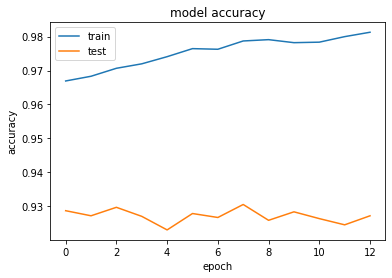

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

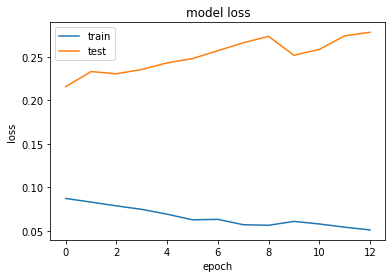

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
score = model.evaluate(x_test, y_test_hot)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1]) 

313/313 [==============================] - 2s 5ms/step - loss: 0.3084 - acc: 0.9218
Test loss: 0.3084143102169037
Test accuracy: 0.9218000173568726


# The Best Model is DNN with CNN